In [1]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression with single feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [3]:
def ModelEquation(input):
    return 0.8*input+0.6

In [4]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 1)
(7500, 1)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.31414709]]  bias  0.0002174125168159394 loss 1.260473860252451
Iteration  1000  weights  [[0.51633791]]  bias  0.1768968666972388 loss 0.5275898471911249
Iteration  2000  weights  [[0.64603545]]  bias  0.29209456739864426 loss 0.22169812678706174
Iteration  3000  weights  [[0.72893348]]  bias  0.3675461309735619 loss 0.09397330542581224
Iteration  4000  weights  [[0.78162798]]  bias  0.4172925663384377 loss 0.040593493247937394
Iteration  5000  weights  [[0.81483826]]  bias  0.45040455033420707 loss 0.0182390371361174
Iteration  6000  weights  [[0.83548766]]  bias  0.4727421641053515 loss 0.00883465466798112
Iteration  7000  weights  [[0.84804753]]  bias  0.48809158909654005 loss 0.004838208880931805
Iteration  8000  weights  [[0.85540539]]  bias  0.4988993524135055 loss 0.0031024987553087253
Iteration  9000  weights  [[0.85942574]]  bias  0.5067466106726682 loss 0.002314111267058345
Iteration  10000  weights  [[0.86131224]]  bias  0.5126555126585782 loss 0.0

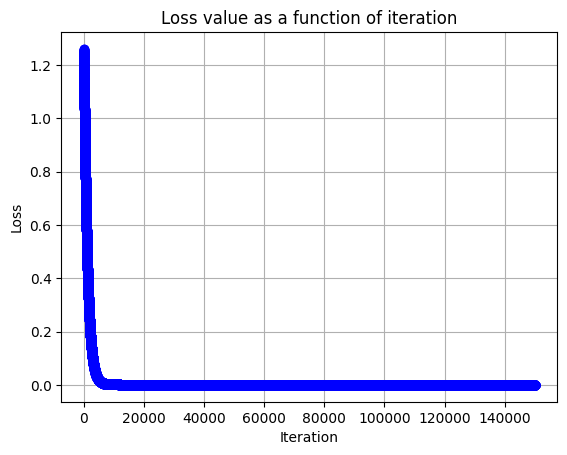

In [6]:
model = LinearRegression(training_features, training_labels , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.80095741]]  bias  0.598867978797856
Prediction loss 3.397592322659005e-07
